## Observations and Insights 

In [176]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [177]:
# Dependencies and Setup
# import matplotlib.pyplot as plt
# import pandas as pd
# import scipy.stats as st

# Study data files
mouse_metadata_path = 'Mouse_metadata.csv'
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [178]:
# Checking the number of mice.
mouse_number = mouse_data['Mouse ID'].value_counts()
len(mouse_number)
# mouse_number.head()

249

In [179]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [180]:
# Optional: Get all the data for the duplicate mouse ID. 



In [181]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_indiv = mouse_data.drop_duplicates(['Mouse ID','Timepoint'], keep=False)


In [182]:
# Checking the number of mice in the clean DataFrame.
mouse_indiv['Mouse ID'].value_counts()
mouse_indiv.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [183]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [184]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
mouse_summary = mouse_indiv.groupby(['Drug Regimen'])
mouse_mean = mouse_summary['Tumor Volume (mm3)'].mean()
summary_table = pd.DataFrame(mouse_mean)
summary_table = summary_table.rename(columns={'Tumor Volume (mm3)':'Mean'})
summary_table['Median'] = mouse_summary['Tumor Volume (mm3)'].median()
summary_table['Variance'] = mouse_summary['Tumor Volume (mm3)'].var()
summary_table['St Dev'] = mouse_summary['Tumor Volume (mm3)'].std()
summary_table['SEM'] = mouse_summary['Tumor Volume (mm3)'].sem()
summary_table


,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

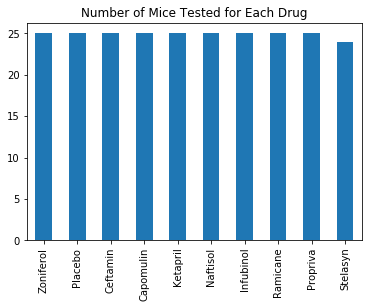

In [185]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_single = mouse_indiv.drop_duplicates(['Mouse ID'])
drug_count = mouse_single['Drug Regimen'].value_counts()
drug_summary = pd.DataFrame(drug_count)
drug_summary.plot(kind='bar', title='Number of Mice Tested for Each Drug', legend=None)



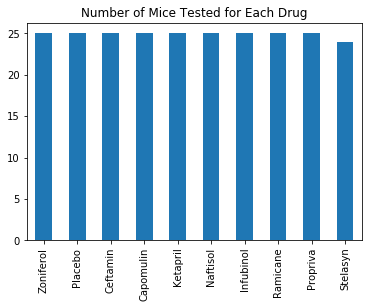

In [186]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(0, 10)
drugs = ['Zoniferol', 'Placebo', 'Ceftamin', 'Capomulin', 'Ketapril','Naftisol','Infubinol','Ramicane','Propriva','Stelasyn']
plt.bar(x_axis, drug_count, align='center', width=0.5)
plt.title('Number of Mice Tested for Each Drug')
plt.xticks(x_axis, drugs, rotation=90);
plt.xlim(-0.5,9.5);



array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a253b4f10>],
      dtype=object)

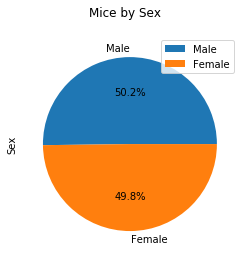

In [291]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = mouse_single['Sex'].value_counts()
gender_summary = pd.DataFrame(mouse_gender)
gender_summary.plot(kind='pie', subplots='True', title='Mice by Sex', autopct='%1.1f%%')

Text(0.5, 1.0, 'Mice by Sex')

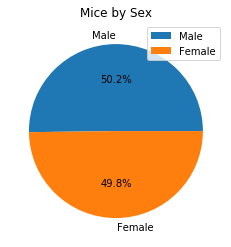

In [290]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender, labels = ['Male', 'Female'], autopct='%1.1f%%')
plt.legend(loc='best')
plt.title("Mice by Sex")

## Quartiles, Outliers and Boxplots

In [223]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_sort = mouse_indiv.sort_values(['Timepoint'], ascending=False)
mouse_max = mouse_sort.drop_duplicates(['Mouse ID'], keep='first')
mouse_final = mouse_max[['Mouse ID','Tumor Volume (mm3)']]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_end = pd.merge(mouse_indiv, mouse_final, on='Mouse ID')
mouse_end = mouse_end.rename(columns={'Tumor Volume (mm3)_y':'Final Tumor Volume(mm3)', 'Tumor Volume (mm3)_x':'Tumor Volume (mm3)'})
mouse_end_summary = mouse_end.drop_duplicates(['Mouse ID'], keep='first')
mouse_end_summary = mouse_end_summary.reset_index(drop=True)
mouse_end_summary

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume(mm3)
0,k403,Ramicane,Male,21,16,0,45.0,0,22.050126
1,s185,Capomulin,Female,3,17,0,45.0,0,23.343598
2,x401,Capomulin,Female,16,15,0,45.0,0,28.484033
3,m601,Capomulin,Male,22,17,0,45.0,0,28.430964
4,g791,Ramicane,Male,11,16,0,45.0,0,29.128472
...,...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,0,45.0,0,45.934712
245,z435,Propriva,Female,12,26,0,45.0,0,48.710661
246,z581,Infubinol,Female,24,25,0,45.0,0,62.754451
247,z795,Naftisol,Female,13,29,0,45.0,0,65.741070


In [210]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_Capo = []
final_tumor_Rami = []
final_tumor_Infu = []
final_tumor_Ceft = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

                              
#         final_tumor_Capo.append(mouse_end_summary['Final Tumor Volume(mm3)'])
#     elif drug_list[1] == mouse_end_summary['Drug Regimen']:
#         final_tumor_Rami.append(mouse_end_summary['Final Tumor Volume(mm3)'])
#     elif drug_list[2] == mouse_end_summary['Drug Regimen']:
#         final_tumor_Infu.append(mouse_end_summary['Final Tumor Volume(mm3)'])
#     else drug_list[3] == mouse_end_summary['Drug Regimen']:
#         final_tumor_Ceft.append(mouse_end_summary['Final Tumor Volume(mm3)'])

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [247]:
# for rows in mouse_end_summary:
#     if mouse_end_summary.loc[(mouse_end_summary['Drug Regimen'] == 'Ramicane')]:
#         print('Yes')
# ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
capomulin = mouse_end_summary.loc[(mouse_end_summary['Drug Regimen'] == 'Capomulin')]
capomulin_tumor=capomulin['Final Tumor Volume(mm3)']
ramicane = mouse_end_summary.loc[(mouse_end_summary['Drug Regimen'] == 'Ramicane')]
ramicane_tumor=ramicane['Final Tumor Volume(mm3)']
infubinol = mouse_end_summary.loc[(mouse_end_summary['Drug Regimen'] == 'Infubinol')]
infubinol_tumor=infubinol['Final Tumor Volume(mm3)']
ceftamin = mouse_end_summary.loc[(mouse_end_summary['Drug Regimen'] == 'Ceftamin')]
ceftamin_tumor=ceftamin['Final Tumor Volume(mm3)']
tumor_list = [capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor]

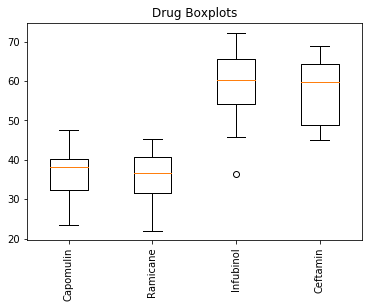

In [255]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
x_axis1 = np.arange(1, 5)
ax1=plt.subplot()
ax1.boxplot(tumor_list);
plt.title('Drug Boxplots')
plt.xticks(x_axis1, drug_list, rotation=90);

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume over Time')

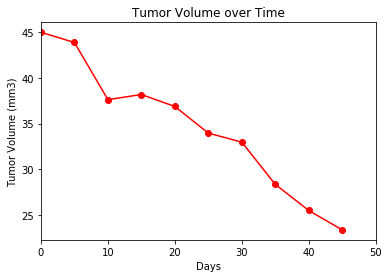

In [263]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin (Using Mouse ID s185)
mouse_capo = mouse_indiv.loc[(mouse_indiv['Drug Regimen'] == 'Capomulin')]
mouse_capo_single = mouse_capo.loc[(mouse_capo['Mouse ID'] == 's185')]
plt.plot(mouse_capo_single['Timepoint'], mouse_capo_single['Tumor Volume (mm3)'], marker='o',color='red')
plt.xlim(0, 50)
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume over Time')

Text(20, 40, 'y=0.9544396890241045x+21.552160532685015')

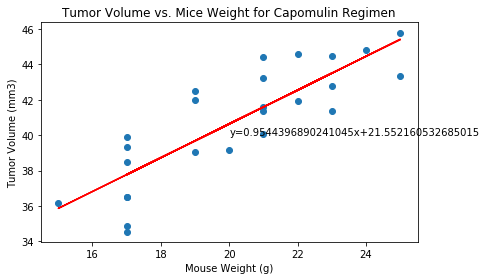

In [284]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_ave_tumor = mouse_capo.groupby(['Mouse ID']).mean()
plt.scatter(mouse_ave_tumor['Weight (g)'], mouse_ave_tumor['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Mice Weight for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)');
plt.ylabel('Tumor Volume (mm3)');
plt.tight_layout()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_ave_tumor['Weight (g)'], mouse_ave_tumor['Tumor Volume (mm3)'])
regress_values = mouse_ave_tumor['Weight (g)']*slope + intercept
plt.plot(mouse_ave_tumor['Weight (g)'], regress_values, 'r-')
plt.annotate(f'y={slope}x+{intercept}', (20,40))

## Correlation and Regression

In [276]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_ave_tumor['Weight (g)'], mouse_ave_tumor['Tumor Volume (mm3)'])
correlation

(0.8419363424694716, 1.3225722434712883e-07)

In [285]:
r_squared=rvalue*rvalue
r_squared

0.7088568047708717

## Conclusions
1. Of the 10 drugs tested there were only 2 that had any notable success in shrinking tumors. Capomulin and Ramicane. This isn't necessarily a bad thing if the purpose was to find a drug that reduced the speed of growth, but looking at the values for the placebo, looks like this wasn't the case for a lot of the drugs trialled.
2. There's a strong postive correlation between Tumor volume and mouse weight for the Capomulin trial. This suggests that the drug is less effective on larger mice, though that may just be because there was a set dosage amount across the trial, hence a standard dose was more potent for the smaller mice
3. Capomulin and Ramicane, the two most successful drugs, had the tumor shrink or stay around the same size in around 75% of their cases. This is quite a promising outcome, so any continued trials should be focussed around these two drugs. 